## Vector Database

In [1]:

from langchain_community.document_loaders import PyPDFLoader

file_path='/nfs/kundeshwar/surajKuralGPT/infosys-ar-23.pdf'
loader = PyPDFLoader(file_path)
pages = []

cnt=0

async for page in loader.alazy_load():
    cnt=cnt+1
    if cnt==15:
        break
    pages.append(page)

In [4]:
### Build Index
# from langchain.document_loaders import CSVLoader
from langchain_ollama import ChatOllama
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma



# Set embeddings
embd = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")


# Docs to index
# urls = [

#     "https://s2.q4cdn.com/661678649/files/doc_financials/2023/q3/fd2a8c99-afc6-4472-ae18-4f1ee024a274.pdf"

# ]


# loader = CSVLoader(file_path='/nfs/kundeshwar/surajKuralGPT/langGraph/thirukkural.csv')
# data = loader.load()


# #Load
# docs = [WebBaseLoader(url).load() for url in urls]



# docs_list = [item for sublist in docs for item in sublist]



# Split
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=512, chunk_overlap=0
)

doc_splits = text_splitter.split_documents(pages)

# Add to vectorstore
vectorstore = Chroma.from_documents(
    documents=doc_splits,
    embedding=embd,
)


retriever = vectorstore.as_retriever()

In [3]:
docs=retriever.invoke("Financial Statements")

In [4]:
docs

[Document(metadata={'page': 195, 'source': '/nfs/kundeshwar/surajKuralGPT/infosys-ar-23.pdf'}, page_content='Note 2.12)  1 – – –  10 – – – – – – –  11 Standalone Financial Statements'),
 Document(metadata={'page': 269, 'source': '/nfs/kundeshwar/surajKuralGPT/infosys-ar-23.pdf'}, page_content="Infosys Integrated Annual Report 2022-23298Meaning of Internal Financial Controls with reference to Consolidated Financial Statements\nA company's internal financial control with reference to Consolidated Financial Statements is a process designed to provide reasonable \nassurance regarding the reliability of financial reporting and the preparation of financial statements for external purposes in accordance \nwith generally accepted accounting principles. A company's internal financial control with reference to Consolidated Financial \nStatements includes those policies and procedures that (1) pertain to the maintenance of records that, in reasonable detail, accurately \nand fairly reflect the tr

In [8]:
pages

[Document(metadata={'source': '/nfs/kundeshwar/surajKuralGPT/infosys-ar-23.pdf', 'page': 0}, page_content='Integrated Annual Report 2022-23'),
 Document(metadata={'source': '/nfs/kundeshwar/surajKuralGPT/infosys-ar-23.pdf', 'page': 1}, page_content='The context surrounding \nan enterprise, created, \nand influenced by multiple \ninherently uncertain forces, can \nsignificantly impact the fortunes \nof a business. While this volatility \nhas come to be expected as normal, \nnot every business emerges from it having \ntackled the situation with the same resilience. \nThose that get a head start in preparing and taking \non the challenges are also the ones that come out of the \nuncertainty with the ability to outperform in the recovery.\nThat does not necessarily mean rethinking one’s business \nstrategy, but rather rearticulating it to adapt. It’s really about being judicious where to lean in and where to pull back. In essence, it’s about protecting one’s capability to innovate and prop

In [5]:

llmRoute= ChatOllama(model='llama3:70b',temperature=0)

In [6]:
question=f"Look at these pages and check for the Contents Section and output the start and end page number for the financial statements. Here are the pages{page}"
response=llmRoute.invoke(question)

In [7]:
response

AIMessage(content='After reviewing the provided pages, I found that there is no explicit "Contents Section" that lists the financial statements with their corresponding page numbers. However, I can help you identify the start and end page numbers for the financial statements based on the content.\n\nThe financial statements appear to start from page 15 (not provided in the given pages) and likely continue until around page 200-220 (a typical range for an annual report). Since the exact page numbers are not available, I\'ll provide a rough estimate based on the content:\n\n* Start page: 15 (approximate)\n* End page: 220 (approximate)\n\nPlease note that these page numbers are estimates and may vary depending on the actual document. If you have access to the complete annual report, you can verify the exact page numbers for the financial statements.', additional_kwargs={}, response_metadata={'model': 'llama3:70b', 'created_at': '2024-10-21T17:38:56.601159001Z', 'message': {'role': 'assist

## LLM

#### Question Router

In [10]:
### Router

from langchain_cohere import ChatCohere
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field


# Data model
class web_search(BaseModel):
    """
    The internet. Use web_search for questions that are related to anything else than agents, prompt engineering, and adversarial attacks.
    """

    query: str = Field(description="The query to use when searching the internet.")


class vectorstore(BaseModel):
    """
    A vectorstore containing documents related to Thirukural Spirituality. It talks about love,affection and detachement. Use the vectorstore for questions on these topics.
    """

    query: str = Field(description="The query to use when searching the vectorstore.")



# Preamble
preambleRoute = """You are an expert at routing a user question to a vectorstore or web search.
The vectorstore contains documents of translation of Kural to English Translation and talks about  Love,Affection and Detachement. It talks about love,affection and detachement.
Use the vectorstore for questions on these topics. Otherwise, use web-search."""




# LLM with tool use and preamble
llmRoute= ChatOllama(model='llama3:70b',temperature=0)

# structured_llm_routerRoute = llmRoute.bind_tools(
#     tools=[vectorstore]
# )



# Prompt
route_prompt = ChatPromptTemplate.from_messages(
    [
        ("human", "{question}"),
    ]
)




# question_router = route_prompt | structured_llm_routerRoute

# response=question_router.invoke(
#     {"question":"What are Cash Flow Hedges of the boeing company?"}
# )

In [11]:
docs=retriever.invoke("Supply chain Finance Program ")
docs

[Document(metadata={'page': 2, 'source': '/nfs/kundeshwar/surajKuralGPT/fd2a8c99-afc6-4472-ae18-4f1ee024a274.pdf'}, page_content='Table of Contents\nPart I. Financial Information\nItem 1. Financial Statements\nThe Boeing Company and Subsidiaries\nCondensed Consolidated Statements of Operations\n(Unaudited)\n(Dollars in millions, except per share data)Nine months ended\nSeptember 30Three months ended\nSeptember 30\n2023 2022 2023 2022\nSales of products $46,661 $38,767 $15,060 $13,331 \nSales of services 9,115 7,861 3,044 2,625 \nTotal revenues 55,776 46,628 18,104 15,956 \nCost of products (43,140) (38,237) (14,464) (14,541)\nCost of services (7,609) (6,725) (2,475) (2,230)\nTotal costs and expenses (50,749) (44,962) (16,939) (16,771)\n5,027 1,666 1,165 (815)\nIncome/(loss) from operating investments, net 45 (27) 28 (24)\nGeneral and administrative expense (3,633) (2,757) (1,043) (1,226)\nResearch and development expense, net (2,496) (2,058) (958) (727)\nGain on dispositions, net 1 2  

In [12]:
question =f"infer from this document and response concisely :{docs}"

response=llmRoute.invoke(question)
response

AIMessage(content="Here are some concise inferences from the document:\n\n**Company Performance**\n\n* The company's BDS (Boeing Defense, Space & Security) business has a backlog of $57.8 billion as of September 30, 2023.\n* The company's share of earnings from equity method investments was $34 million and $24 million for the nine and three months ended September 30, 2023.\n\n**Program Risks**\n\n* The company faces financial risks in its development programs, including cost-type contracting arrangements and fixed-price contracts.\n* Examples of complex development programs include Ground-based Midcourse Defense, Proprietary and Space Launch System, Commercial Crew, KC-46A Tanker, MQ-25, T-7A Red Hawk, VC-25B, and commercial and military satellites.\n\n**Inventory and Production**\n\n* The company's commercial aircraft programs inventory includes deferred production costs and unamortized tooling and other non-recurring costs for the 737, 777X, and 787 programs.\n* The 777X program has 

In [16]:
docs= retriever.invoke("What are Total Costs and Expenses (“Cost of Sales”) for the year 2023 of the boeing company? Answer in dollars")
question =f"What are Total Costs and Expenses (“Cost of Sales”) for the year 2023?. Refer to this documentation for the information:{docs}"


In [17]:
docs

[Document(metadata={'page': 2, 'source': '/nfs/kundeshwar/surajKuralGPT/fd2a8c99-afc6-4472-ae18-4f1ee024a274.pdf'}, page_content='Table of Contents\nPart I. Financial Information\nItem 1. Financial Statements\nThe Boeing Company and Subsidiaries\nCondensed Consolidated Statements of Operations\n(Unaudited)\n(Dollars in millions, except per share data)Nine months ended\nSeptember 30Three months ended\nSeptember 30\n2023 2022 2023 2022\nSales of products $46,661 $38,767 $15,060 $13,331 \nSales of services 9,115 7,861 3,044 2,625 \nTotal revenues 55,776 46,628 18,104 15,956 \nCost of products (43,140) (38,237) (14,464) (14,541)\nCost of services (7,609) (6,725) (2,475) (2,230)\nTotal costs and expenses (50,749) (44,962) (16,939) (16,771)\n5,027 1,666 1,165 (815)\nIncome/(loss) from operating investments, net 45 (27) 28 (24)\nGeneral and administrative expense (3,633) (2,757) (1,043) (1,226)\nResearch and development expense, net (2,496) (2,058) (958) (727)\nGain on dispositions, net 1 2  

In [18]:
response=llmRoute.invoke(question)

In [20]:
for line in response.content.split("\n"):
    print(line)
    

According to the provided text, the Total Costs and Expenses (also known as "Cost of Sales") for the year 2023 are:

$2,496 million

This is broken down into:

* Commercial Airplanes: $652 million
* Defense, Space & Security: $706 million
* Global Services: $84 million
* Other: $222 million


In [26]:
docs= retriever.invoke("What are the backlogs for the year 2023 and 2022 of the comany?")
question =f"What are backlogs of the company for the year 2023 and 2022 ? Breakdown the answer. Refer to this documentation for the information:{docs}"
response=llmRoute.invoke(question)


In [29]:
for line in response.content.split("\n"):
    print(line)



Based on the provided text, here are the backlogs of the company for the year 2023 and 2022:

**Backlog as of September 30, 2023:**

* Total backlog: $469,178
* Expected conversion to revenue:
	+ Approximately 21% through 2024
	+ Approximately 71% through 2027
	+ Remainder thereafter

**Breakdown of Backlog (not explicitly stated for 2022, but can be inferred from the text):**

* Contractual backlog: Increased during the nine months ended September 30, 2023, primarily due to increases in BCA and BDS backlog.
* Unobligated backlog: Largely unchanged during the nine months ended September 30, 2023. This includes U.S. and non-U.S. government definitive contracts for which funding has not been authorized.

Note that there is significant uncertainty regarding the timing of when backlog will convert into revenue due to factors such as the timing of 737 and 787 deliveries from inventory and the entry into service of the 777X, 737-7, and/or 737-10.


## Life-Insurance


In [3]:
llmRoute2= ChatOllama(model='llama3:70b',temperature=0)

In [4]:
docs=retriever.invoke("What type of life insurance is being offered (term, whole life, universal, etc.)?")

In [5]:
docs

[Document(metadata={'page': 7, 'source': '/nfs/kundeshwar/surajKuralGPT/Principal-Sample-Life-Insurance-Policy.pdf'}, page_content='This policy has been updated effective January 1, 2014  \n \n \n \nGC 6001  TABLE OF CONTENTS, PAGE 3  \n  \n \n Section A - Member Life Insurance  \n \n \n Schedule of Insurance  Article 1  \n Death Benefits Payable  Article 2  \n Beneficiary  Article 3  \n Facility of Payment  Article 4  \n Settlement of Proceeds  Article 5  \n Member Life Insurance - Coverage During Disability  Article 6  \n \n Accelerated Benefits  Article 7  \n \n \n Section B - Member Accidental Death and Dismemberment Insurance  \n \n \n Schedule of Insurance  Article 1  \n Benefit Qualification  Article 2  \n Benefits Payable  Article 3  \n \n Seat Belt Benefit  Article 4  \n Loss of Use or Paralysis Benefit  Article 5  \n Loss of Speech and/or Hearing Benefit  Article 6  \n Repatriation Benefit  Article 7  \n Educational Benefit  Article 8  \n \n Limitations  Article 9  \n \n \n S

In [6]:
question =f"What type of life insurance is being offered (term, whole life,universal, etc.)? refer to this doc: {docs}"
response2=llmRoute2.invoke(question)

In [7]:
for line in response2.content.splitlines("\n"):
    print(line)

Based on the provided document, the type of life insurance being offered is Whole Life Insurance.



Here's why:



1. In Section F - Individual Purchase Rights (Page 41), it mentions that the policy will be for "life insurance only" and that no disability or other benefits will be included.

2. It also states that the policy will be on one of the forms, other than term insurance, then issued by The Principal to persons in the risk class to which the Member belongs on the individual policy's effective date. This suggests that the policy is a permanent life insurance policy, rather than a term life insurance policy.

3. Additionally, there is no mention of a specific term or duration for the coverage, which is consistent with whole life insurance policies.



It's worth noting that the document does not explicitly state that it's a whole life insurance policy, but based on the language and structure of the policy, it appears to be a type of permanent life insurance.


## RAG CHAIN

In [10]:
### Generate

from langchain_core.messages import HumanMessage
from langchain_core.output_parsers import StrOutputParser


# Preamble
preambleRAG = """You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise."""

# LLM
llmRAG= ChatOllama(model='llama3.1',temperature=0).bind(preamble=preambleRAG)


# Prompt
def prompt(x):
    return ChatPromptTemplate.from_messages(
        [
            HumanMessage(
                f"Question: {x['question']} \nAnswer: ",
                additional_kwargs={"documents": x["documents"]},
            )
        ]
    )


# Chain
rag_chain = prompt | llmRAG | StrOutputParser()

# Run
# generation = rag_chain.invoke({"documents": docs, "question": question})
# print(generation)

## Retrieval Grader

In [11]:
### Retrieval Grader
from typing import Optional


# Data Model

class GradeDocuments(BaseModel):
    """Binary score for relevance check on retrieved documents."""
    
    binary_score:str=Field(
        description="Documents are relevant to the question, 'yes' or 'no"
    )

# Prompt
preambleRetriever = """You are a grader assessing relevance of a retrieved document to a user question. 
If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. 
Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question."""




# LLM with function call
llmRetrieval= ChatOllama(model='llama3.1',temperature=0).bind(preamble=preambleRetriever)
structured_llm_graderRetrieval = llmRetrieval.with_structured_output(GradeDocuments)

grade_prompt = ChatPromptTemplate.from_messages(
    [

        
        ("human", "Retrieved document: \n\n {document} \n\n User question: {question}"),
    ]
)


retrieval_grader = grade_prompt | structured_llm_graderRetrieval



### LLM Fallback

In [12]:
### LLM fallback
from langchain_core.messages import HumanMessage
from langchain_core.output_parsers import StrOutputParser

# Preamble
preambleFall = """You are an assistant for question-answering tasks. Answer the question based upon your knowledge. Use three sentences maximum and keep the answer concise."""

# LLM
llmFall= ChatOllama(model='llama3.1',temperature=0).bind(preamble=preambleFall)


# Prompt
def prompt(x):
    return ChatPromptTemplate.from_messages(
        [HumanMessage(f"Question: {x['question']} \nAnswer: ")]
    )


# Chain
llm_chain = prompt | llmFall | StrOutputParser()

# Run
# question = "Hi how are you?"
# generation = llm_chain.invoke({"question": question})
# print(generation)

## Answer Grader

In [13]:
### Answer Grader


# Data model
class GradeAnswer(BaseModel):
    """Binary score to assess answer addresses question."""

    binary_score: str = Field(
        description="Answer addresses the question, 'yes' or 'no'"
    )


# Preamble
preambleGrader = """You are a grader assessing whether an answer addresses / resolves a question \n
Give a binary score 'yes' or 'no'. Yes' means that the answer resolves the question."""

# LLM with function call
llmGraderAnswer= ChatOllama(model='llama3.1',temperature=0).bind(preamble=preambleGrader)
structured_llm_graderAnswer= llmGraderAnswer.with_structured_output(GradeAnswer)

# Prompt
answer_prompt = ChatPromptTemplate.from_messages(
    [
        ("human", "User question: \n\n {question} \n\n LLM generation: {generation}"),
    ]
)

answer_grader = answer_prompt | structured_llm_graderAnswer

# answer_grader.invoke({"question": question, "generation": generation})

## Hallucination Grader

In [14]:
### Hallucination Grader


# Data model
class GradeHallucinations(BaseModel):
    """Binary score for hallucination present in generation answer."""

    binary_score: str = Field(
        description="Answer is grounded in the facts, 'yes' or 'no'"
    )


# Preamble
preambleHallucination = """You are a grader assessing whether an LLM generation is grounded in / supported by a set of retrieved facts. \n
Give a binary score 'yes' or 'no'. 'Yes' means that the answer is grounded in / supported by the set of facts."""


# LLM with function call
llmHallucination= ChatOllama(model='llama3.1',temperature=0).bind(preamble=preambleHallucination)

structured_llm_graderHallucination = llmHallucination.with_structured_output(GradeHallucinations)

# Prompt
hallucination_prompt = ChatPromptTemplate.from_messages(
    [
        # ("system", system),
        ("human", "Set of facts: \n\n {documents} \n\n LLM generation: {generation}"),
    ]
)

hallucination_grader = hallucination_prompt | structured_llm_graderHallucination
# response=hallucination_grader.invoke({"documents": docs, "generation": generation})

## WebSearchTool

In [9]:
# ### Working With Tools
# from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper
# from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun

# ## Arxiv and wikipedia Tools
# # arxiv_wrapper=ArxivAPIWrapper(top_k_results=1, doc_content_chars_max=200)
# # arxiv=ArxivQueryRun(api_wrapper=arxiv_wrapper)

# api_wrapper=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=200)
# wiki=WikipediaQueryRun(api_wrapper=api_wrapper)

In [15]:
### Search
import os
os.environ['TAVILY_API_KEY'] ='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'

from langchain_community.tools.tavily_search import TavilySearchResults

web_search_tool = TavilySearchResults()

In [16]:
from typing import List

from typing_extensions import TypedDict


class GraphState(TypedDict):
    """|
    Represents the state of our graph.

    Attributes:
        question: question
        generation: LLM generation
        documents: list of documents
    """

    question: str
    generation: str
    documents: List[str]

In [17]:
from langchain.schema import Document


def retrieve(state):
    """
    Retrieve documents

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    print("---RETRIEVE---")
    question = state["question"]

    # Retrieval
    documents = retriever.invoke(question)
    print("Retrieve karne Jaa rahen hain")
    return {"documents": documents, "question": question}


def llm_fallback(state):
    """
    Generate answer using the LLM w/o vectorstore

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, generation, that contains LLM generation
    """
    print("---LLM Fallback---")
    question = state["question"]
    generation = llm_chain.invoke({"question": question})
    return {"question": question, "generation": generation}


def generate(state):
    """
    Generate answer using the vectorstore

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, generation, that contains LLM generation
    """
    print("---GENERATE---")
    question = state["question"]
    documents = state["documents"]
    if not isinstance(documents, list):
        documents = [documents]

    # RAG generation
    generation = rag_chain.invoke({"documents": documents, "question": question})
    return {"documents": documents, "question": question, "generation": generation}


def grade_documents(state):
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with only filtered relevant documents
    """

    print("---CHECK DOCUMENT RELEVANCE TO QUESTION---")
    question = state["question"]
    documents = state["documents"]

    # Score each doc
    filtered_docs = []
    for d in documents:
        try:
            score = retrieval_grader.invoke(
                {"question": question, "document": d.page_content}
            )
            grade = score.binary_score
            if grade == "yes":
                print("---GRADE: DOCUMENT RELEVANT---")
                filtered_docs.append(d)
            else:
                print("---GRADE: DOCUMENT NOT RELEVANT---")
        except Exception as e:
            print(f"Error while grading document: {e}")
            continue

    print("Documents Graded Sahi se hogayen")
    return {"documents": filtered_docs, "question": question}


def web_search(state):
    """
    Web search based on the re-phrased question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with appended web results
    """

    print("---WEB SEARCH---")
    question = state["question"]

    # Web search
    docs = web_search_tool.invoke({"query": question})
    web_results = "\n".join([d["content"] for d in docs])
    web_results = Document(page_content=web_results)

    return {"documents": web_results, "question": question}


### Edges ###


def route_question(state):
    """
    Route question to web search or RAG.

    Args:
        state (dict): The current graph state

    Returns:
        str: Next node to call
    """

    print("---ROUTE QUESTION---")
    question = state["question"]
    source = question_router.invoke({"question": question})

    # Fallback to LLM or raise error if no decision
    if "tool_calls" not in source.response_metadata['message']:
        print("---ROUTE QUESTION TO LLM---")
        return "llm_fallback"
    if len(source.response_metadata['message']['tool_calls']) == 0:
        raise "Router could not decide source"

    # Choose datasource
    datasource = source.response_metadata['message']['tool_calls'][0]['function']['name']
    if datasource == "web_search":
        print("---ROUTE QUESTION TO WEB SEARCH---")
        return "web_search"
    elif datasource == "vectorstore":
        print("---ROUTE QUESTION TO RAG---")
        return "vectorstore"
    else:
        print("---ROUTE QUESTION TO LLM---")
        return "vectorstore"


def decide_to_generate(state):
    """
    Determines whether to generate an answer, or re-generate a question.

    Args:
        state (dict): The current graph state

    Returns:
        str: Binary decision for next node to call
    """

    print("---ASSESS GRADED DOCUMENTS---")
    state["question"]
    filtered_documents = state["documents"]
    
    print("Decide kar rahen hain Generate through retrieval or wiki")

    if not filtered_documents:
        # All documents have been filtered check_relevance
        # We will re-generate a new query
        print("---DECISION: ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, WEB SEARCH---")
        return "web_search"
    else:
        # We have relevant documents, so generate answer
        print("---DECISION: GENERATE---")
        return "generate"


def grade_generation_v_documents_and_question(state):
    """
    Determines whether the generation is grounded in the document and answers question.

    Args:
        state (dict): The current graph state

    Returns:
        str: Decision for next node to call
    """

    print("---CHECK HALLUCINATIONS---")
    question = state["question"]
    documents = state["documents"]
    generation = state["generation"]

    score = hallucination_grader.invoke(
        {"documents": documents, "generation": generation}
    )
    
    grade=None
    if score is None:
        print("Initially Score is None")
        grade="yes"
    else:
        
        grade = score.binary_score

    # Check hallucination
    if grade == "yes":
        print("---DECISION: GENERATION IS GROUNDED IN DOCUMENTS---")
        # Check question-answering
        print("---GRADE GENERATION vs QUESTION---")
        score = answer_grader.invoke({"question": question, "generation": generation})
        grade = score.binary_score
        if grade == "yes":
            print("---DECISION: GENERATION ADDRESSES QUESTION---")
            return "useful"
        else:
            print("---DECISION: GENERATION DOES NOT ADDRESS QUESTION---")
            return "not useful"
    else:
        print("---DECISION: GENERATION IS NOT GROUNDED IN DOCUMENTS, RE-TRY---")
        return "not supported"

In [18]:

import pprint

from langgraph.graph import END, StateGraph, START
from langgraph.checkpoint.memory import MemorySaver

workflow = StateGraph(GraphState)

# Define the nodes
# workflow.add_node("web_search", web_search)  # web search
workflow.add_node("retrieve", retrieve)  # retrieve
workflow.add_node("grade_documents", grade_documents)  # grade documents
workflow.add_node("generate", generate)  # rag
workflow.add_node("llm_fallback", llm_fallback)  # llm

# Build graph
workflow.add_conditional_edges(
    START,
    route_question,
    {
        # "web_search": "web_search",
        "vectorstore": "retrieve",
        "llm_fallback": "llm_fallback",
    },
)

#retrieve sahi se chal raha hain
#Documents Graded Sahi se hogayen

# workflow.add_edge("web_search", "generate")
workflow.add_edge("retrieve", "grade_documents")
workflow.add_conditional_edges(
    "grade_documents",
    decide_to_generate,
    {
        # "web_search": "web_search",
        "generate": "generate",
    },
)

workflow.add_conditional_edges(
    "generate",
    grade_generation_v_documents_and_question,
    {
        "not supported": "generate",  # Hallucinations: re-generate
        # "not useful": "web_search",  # Fails to answer question: fall-back to web-search
        "useful": END,
    },
)
workflow.add_edge("llm_fallback", END)

memory=MemorySaver()
# Compile
app = workflow.compile(checkpointer=memory)

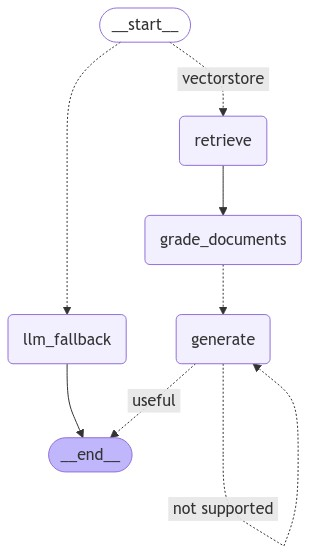

In [19]:
# View
from IPython.display import Image,display

display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
# inputs = {
#     "question": "Who is shahrukh Khan?"
# }

In [16]:
# output=app.invoke(inputs)

In [17]:
# output

In [18]:
# inputs = {
#     "question": "What are Agents?"
# }


# output=app.invoke(inputs)

In [19]:
# output

In [22]:
config={"configurable":{"thread_id":"1"}}

inputs = {"question": "What are Total Costs and Expenses (“Cost of Sales”) for the year 2023 for the boeing company,answer in dollar?"}

In [23]:
# Run


for output in app.stream(inputs,config):
    for key, value in output.items():
        # Node
        pprint.pprint(f"Node '{key}':")
        # Optional: print full state at each node
    pprint.pprint("\n---\n")


# Final generation
pprint.pprint(value["generation"])

---ROUTE QUESTION---
---ROUTE QUESTION TO RAG---
---RETRIEVE---
Retrieve karne Jaa rahen hain
"Node 'retrieve':"
'\n---\n'
---CHECK DOCUMENT RELEVANCE TO QUESTION---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
Documents Graded Sahi se hogayen
---ASSESS GRADED DOCUMENTS---
Decide kar rahen hain Generate through retrieval or wiki
---DECISION: GENERATE---
"Node 'grade_documents':"
'\n---\n'
---GENERATE---
---CHECK HALLUCINATIONS---
Initially Score is None
---DECISION: GENERATION IS GROUNDED IN DOCUMENTS---
---GRADE GENERATION vs QUESTION---
---DECISION: GENERATION DOES NOT ADDRESS QUESTION---


KeyError: 'not useful'